In [1]:
import pandas as pd

In [57]:
#read the csv file from local directory
df = pd.read_csv(r"C:\Users\matti\Documents\ADM\HW2\steam_reviews\steam_reviews.csv")

## [RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.

In [58]:
#The purpose of the dataset is to collect all reviews related to games. We can consider a review valid even if it lacks content, as long as it has the "recommended" flag set, as it still provides information.
#In this case, there are no records where both of the aforementioned fields are null; therefore, we have decided not to discard any records.
df[df["review"].isna() & df["recommended"].isna()]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played


### Identify which applications have the highest and lowest number of reviews.

In [59]:
app_review_count = df["app_name"].value_counts()

app_max_review = app_review_count.idxmax()
max_reviews = app_review_count.max()

app_min_review = app_review_count.idxmin()
min_reviews = app_review_count.min()

print(f"The app with the highest number of reviews is: {app_max_review} with {max_reviews} reviews")
print(f"The app with the lowest number of reviews is: {app_min_review} with {min_reviews} reviews")


The app with the highest number of reviews is: PLAYERUNKNOWN'S BATTLEGROUNDS with 1644255 reviews
The app with the lowest number of reviews is: Neon Hardcorps with 200 reviews


### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

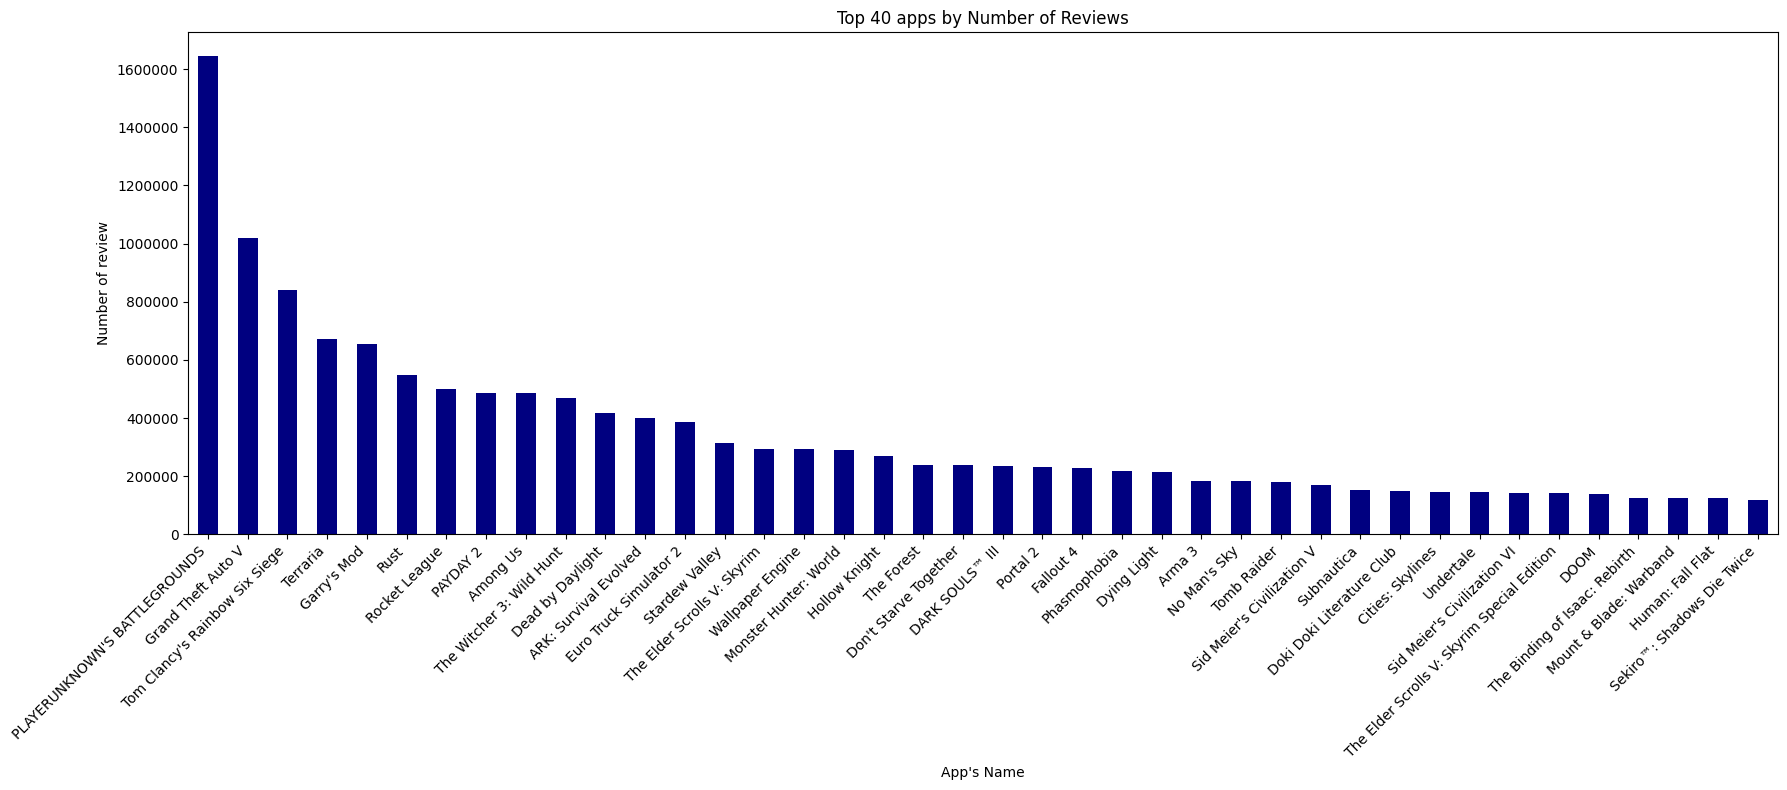

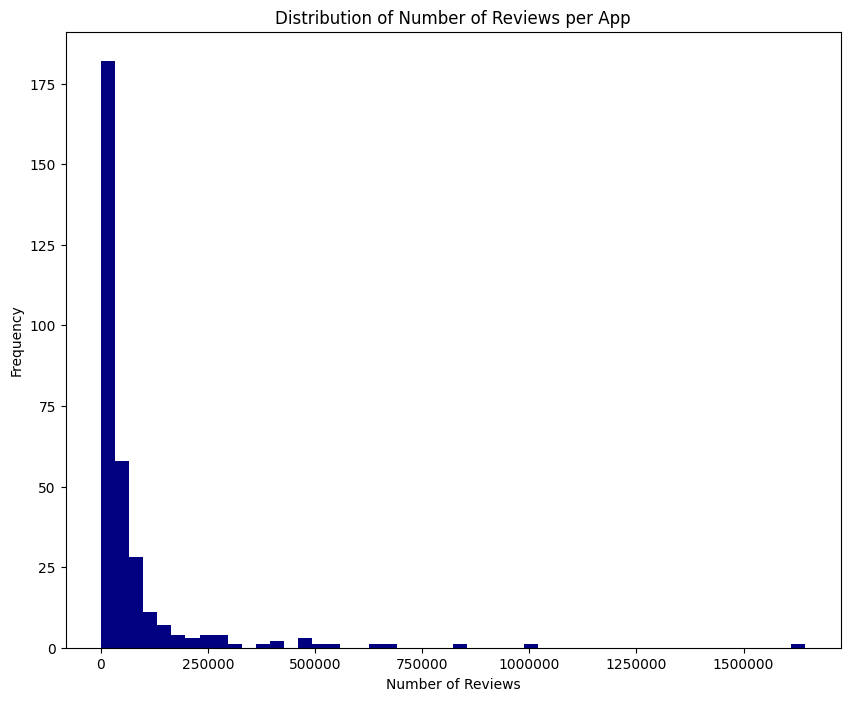

In [92]:
#We have 315 applications, and representing them all together while keeping the chart readable would not be feasible. Therefore, we will represent only the top 40 applications in the first chart. 
import matplotlib.pyplot as plt

n_apps=40
top_n_apps = app_review_count.head(n_apps)
top_n_apps.plot(kind='bar', figsize=(18, 8), color='#000080')
plt.title(f"Top {n_apps} apps by Number of Reviews")
plt.xlabel("App's Name")
plt.ylabel("Number of review")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

#To give an overall idea, we will also represent the frequency distribution of the number of reviews.
app_review_count.plot(kind='hist', bins=50, color='#000080', figsize=(10, 8))
plt.title("Distribution of Number of Reviews per App")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='x', style='plain')
plt.show()


We can see that there are only a few applications with a very high number of reviews: Playerunknown's Battlegrounds, GTA V, and Rainbow Six Siege, while the majority of applications have a low number of reviews.

### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

In [ ]:
top_5_apps = app_review_count.head(5)
df_top_5_apps=df[df['app_name'].isin(top_5_apps.index)]
#Analyzing the dataset, we realize that the fields 'received_for_free' and 'steam_purchase' are not mutually exclusive. To avoid skewing the numbers, we need to clean the data to ensure exclusivity between these two fields.
df_top_5_apps = df_top_5_apps[~((df_top_5_apps['steam_purchase'] == True) & (df_top_5_apps['received_for_free'] == True) | (df_top_5_apps['steam_purchase'] == False) & (df_top_5_apps['received_for_free'] == False))]
n_review = len(df_top_5_apps)
n_review_free_app_perc = round(len(df_top_5_apps[df_top_5_apps['received_for_free']])/n_review *100,2)
n_review_buy_app_perc = round(len(df_top_5_apps[df_top_5_apps['steam_purchase']])/n_review *100,2)
print(f"Reviews from users who received the game as a gift: {n_review_free_app_perc}%\nReviews from users who purchased the game on steam: {n_review_buy_app_perc}%")

# We calculate the percentage of reviews for each of the top 5 apps to see if there are similarities among them and if they differ from the total.
percentages = df_top_5_apps.groupby('app_name').apply(
    lambda app: pd.Series({
        'percent_free': len(app[app['received_for_free']]) / len(app) * 100,
        'percent_purchased': len(app[app['steam_purchase']]) / len(app) * 100
    })
)
print(percentages)

del df_top_5_apps
#We note that all 5 apps have similar percentages of reviews among themselves.

Reviews from users who received the game as a gift: 1.38%
Reviews from users who purchased the game on steam: 98.62%
                                percent_free  percent_purchased
app_name                                                       
Garry's Mod                         1.339069          98.660931
Grand Theft Auto V                  0.758511          99.241489
PLAYERUNKNOWN'S BATTLEGROUNDS       1.325478          98.674522
Terraria                            1.806195          98.193805
Tom Clancy's Rainbow Six Siege      1.982803          98.017197


C:\Users\matti\AppData\Local\Temp\ipykernel_9128\2600182815.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentages = df_top_5_apps.groupby('app_name').apply(


### Which applications have the most and the least user recommendations? Summarize your findings.

In [75]:
app_recommendation_count = df.groupby('app_name')['recommended'].sum()
top_3_most_recommended = app_recommendation_count.nlargest(3)
top_3_least_recommended = app_recommendation_count.nsmallest(3)

print("The 3 apps with the highest number of recommendations are:")
for app, count in top_3_most_recommended.items():
    print(f"{app}: {count} recommendations")
    
print("\nThe 3 apps with the lowest number of recommendations are:")
for app, count in top_3_least_recommended.items():
    print(f"{app}: {count} recommendations")

The 3 apps with the highest number of recommendations are:
PLAYERUNKNOWN'S BATTLEGROUNDS: 886417 recommendations
Grand Theft Auto V: 831311 recommendations
Tom Clancy's Rainbow Six Siege: 742397 recommendations

The 3 apps with the lowest number of recommendations are:
Neon Hardcorps: 89 recommendations
DRAGON QUEST HEROES™ II: 423 recommendations
Identity: 439 recommendations


In [76]:
#We immediately notice that the apps with the most recommendations are also those with the highest number of reviews.
# We can try to normalize the number of recommendations by dividing by the number of reviews (calculated in Q1) for each app, and we’ll observe that the result changes.
app_recommendation_ratio=pd.merge(app_recommendation_count.reset_index(),app_review_count.reset_index(), how='inner', on='app_name')
app_recommendation_ratio['recommended_ratio']=app_recommendation_ratio.loc[:,'recommended']/app_recommendation_ratio.loc[:,'count']
app_recommendation_ratio = app_recommendation_ratio.set_index('app_name')['recommended_ratio']

top_3_most_recommended = app_recommendation_ratio.nlargest(3)
top_3_least_recommended = app_recommendation_ratio.nsmallest(3)

print("The 3 apps with the highest number of recommendations are:")
for app, count in top_3_most_recommended.items():
    print(f"{app}: {round(count*100,2)}% recommendations")

print("\nThe 3 apps with the lowest number of recommendations are:")
for app, count in top_3_least_recommended.items():
    print(f"{app}: {round(count*100,2)}% recommendations")

The 3 apps with the highest number of recommendations are:
ULTRAKILL: 99.53% recommendations
Senren＊Banka: 99.4% recommendations
A Short Hike: 99.14% recommendations

The 3 apps with the lowest number of recommendations are:
Identity: 24.33% recommendations
RollerCoaster Tycoon World: 24.51% recommendations
SOS: 27.84% recommendations


### Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.

In [78]:
#The data of interest do not follow a normal distribution, so we will use Spearman's correlation.
# Spearman measures the correlation between the ranks of the variables rather than their raw values, making it less sensitive to non-normality and outliers.

from scipy.stats import spearmanr

grouped_df = df.groupby('app_name').agg({
    'recommended': 'sum',
    'weighted_vote_score': 'mean'
}).reset_index()

corr, p_value = spearmanr(grouped_df['recommended'], grouped_df['weighted_vote_score'])

print("Spearman correlation:", corr)
print("p-value:", p_value)

if p_value < 0.05: print("The correlation is statistically significant.")
else: print("The correlation is NOT statistically significant.")


Spearman correlation: -0.6258916454440435
p-value: 1.1618128912072842e-35
The correlation is statistically significant.


### Interpretation of Results

- **Spearman Correlation**: The correlation value is **-0.6258**, indicating a moderate negative monotonic correlation. This suggests that as the number of recommendations increases, scores tend to decrease (or vice versa), although the relationship is not perfect.

- **p-value**: The p-value is **1.16e-35**, an extremely low number (much lower than 0.05), indicating that the observed correlation is statistically significant. Therefore, it is unlikely that this negative relationship is due to chance.

We can conclude that there is a significant negative correlation between the number of recommendations and the average game scores: as recommendations increase, scores tend to decrease, and this relationship is statistically relevant.



## [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.

### Plot the number of reviews submitted each month and describe any trends.
### Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.

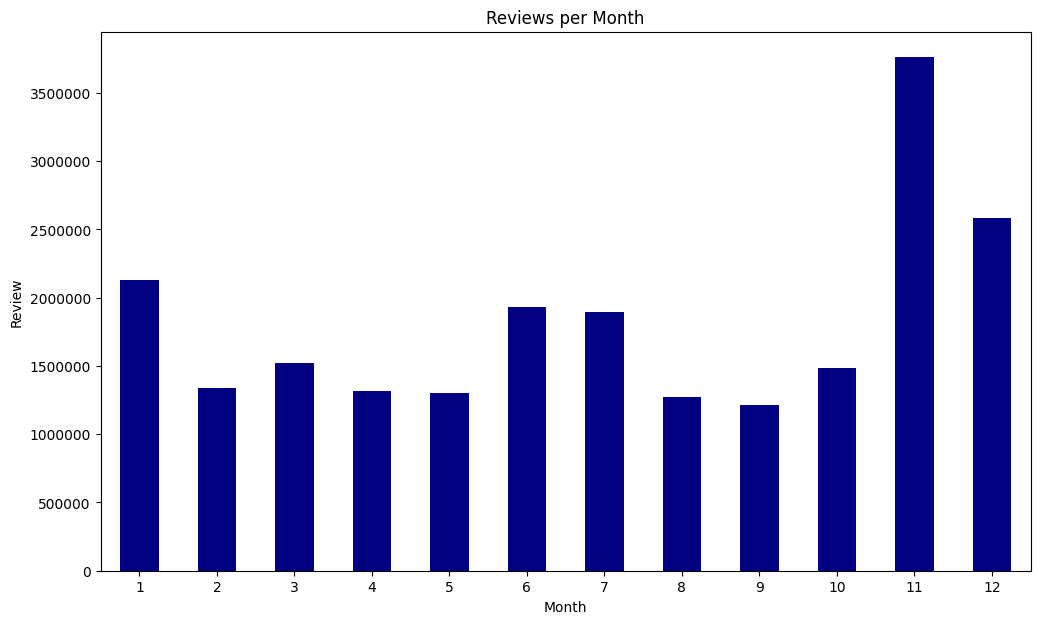

In [79]:
df['date_time_created'] =pd.to_datetime(df['timestamp_created'], unit='s')
df['month'] = df['date_time_created'].dt.month
month_review = df.groupby('month').size()
month_review.plot(kind='bar', figsize=(12,7), color='#000080')
plt.title("Reviews per Month")
plt.xlabel("Month")
plt.ylabel("Review")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Monthly Review Trend Analysis

Observing the chart, we can identify the following seasonal trends:

**Significant Increase in Reviews in November and December**:  
   - A peak in reviews is observed during the months of November and December. This indicates a trend of users leaving more reviews during holiday periods, such as Black Friday, Cyber Monday, and the Christmas season, confirmed by the fact that many games are gifted or purchased due to substantial discounts during this time.

**Decrease in Reviews**:  
   - February, April, May, August, and September are the months with the fewest reviews.  
      - August has the lowest counts overall, as expected, being the quintessential vacation month, during which users are less active due to travel or the desire to engage in outdoor activities.



### Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.

We hypothesized that user activity peaks might be correlated with specific events, such as holidays or discount periods, particularly around Black Friday and the Christmas holidays.
Let's check if these activity peaks actually correspond to these events.
Knowing that Black Friday is the Friday following Thanksgiving (which is the fourth Thursday in November) and that Christmas is on December 25, we would expect peaks in the last week of November and in the days following December 25.


C:\Users\matti\AppData\Local\Temp\ipykernel_9128\3607655036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_november['day'] = df_november['date_time_created'].dt.day
C:\Users\matti\AppData\Local\Temp\ipykernel_9128\3607655036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_december['day'] = df_december['date_time_created'].dt.day


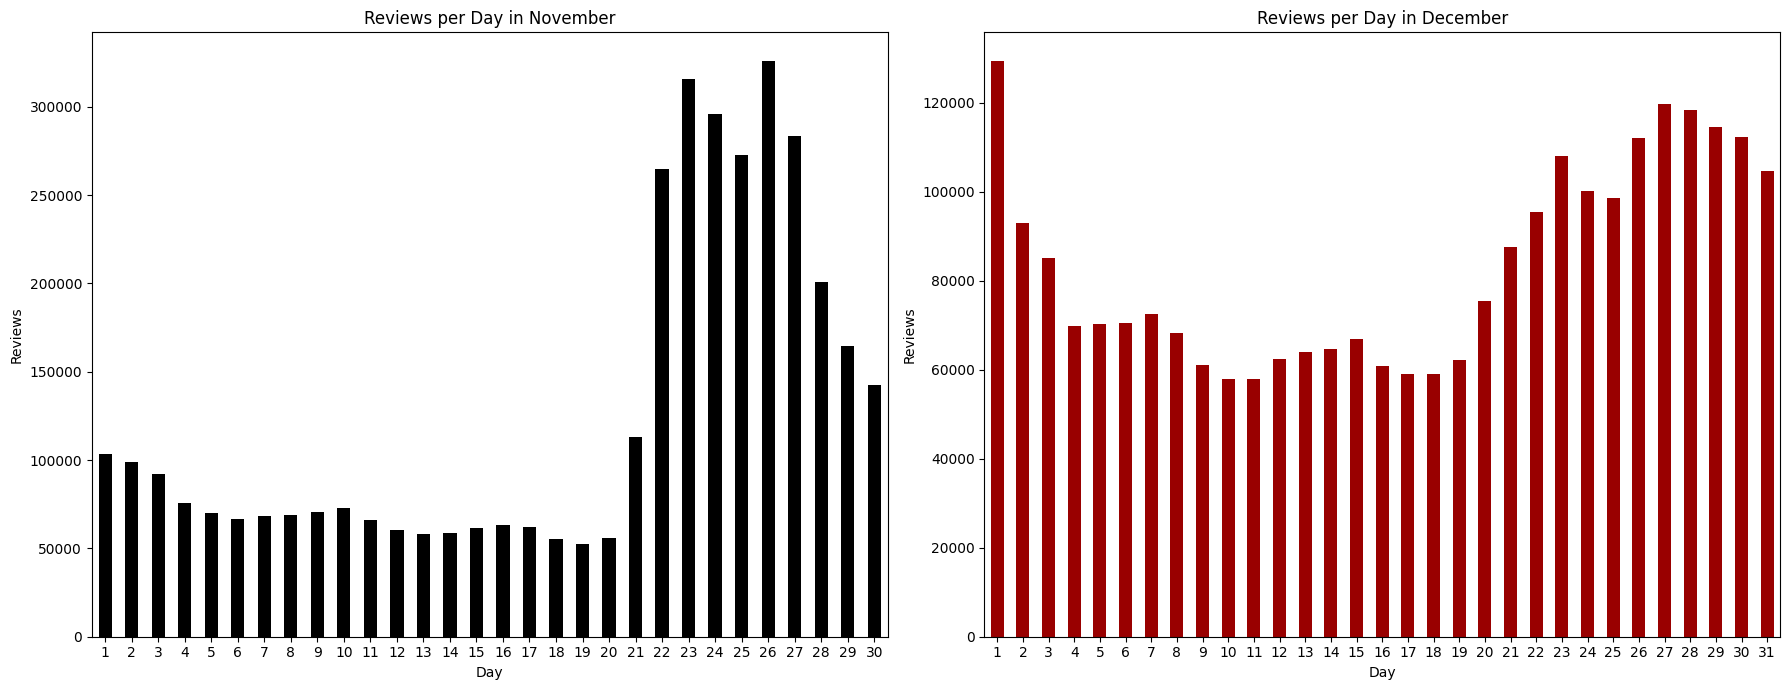

In [83]:
#November data
df_november = df[df['month'] == 11]
df_november['day'] = df_november['date_time_created'].dt.day
november_review = df_november.groupby('day').size()
#December data
df_december = df[df['month'] == 12]
df_december['day'] = df_december['date_time_created'].dt.day
december_reviews = df_december.groupby('day').size()
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# November plot
november_review.plot(kind='bar', ax=axes[0], color='#000000')
axes[0].set_title("Reviews per Day in November")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Reviews")
axes[0].ticklabel_format(axis='y', style='plain')
axes[0].tick_params(rotation=0)
# December plot
december_reviews.plot(kind='bar', ax=axes[1], color='#990000')
axes[1].set_title("Reviews per Day in December")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Reviews")
axes[1].ticklabel_format(axis='y', style='plain')
axes[1].tick_params(rotation=0)

plt.tight_layout()
plt.show()

del df_november, df_december

As expected, we can observe that the peaks in reviews are caused by the massive purchase of games during the Black Friday period and around Christmas.

### What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.

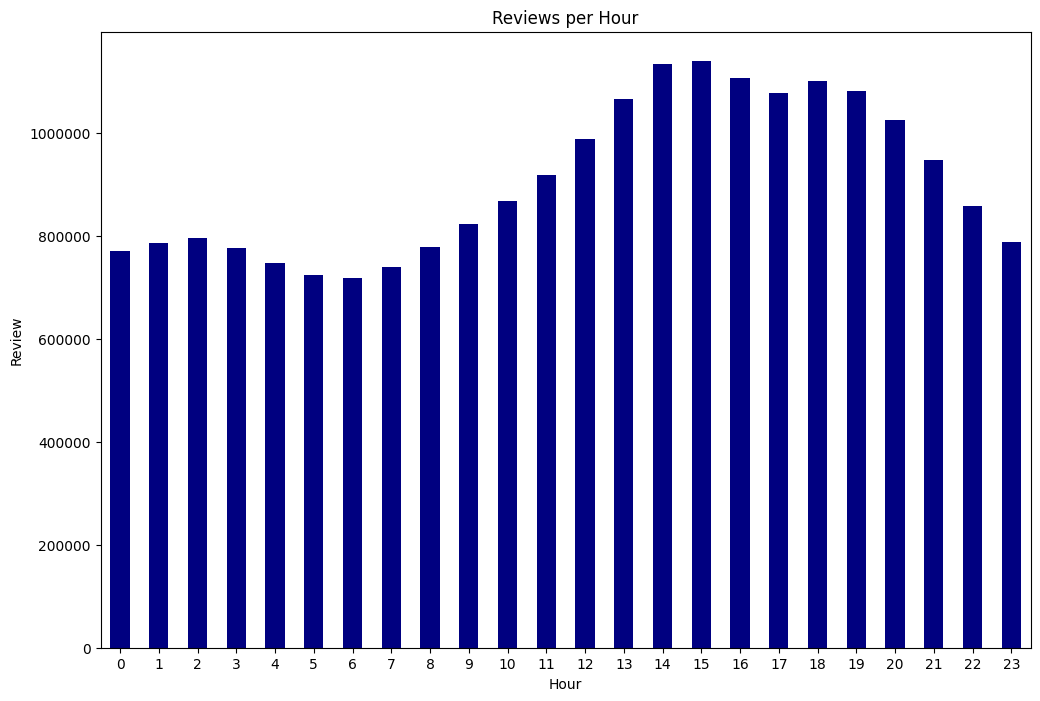

In [85]:
df['hour'] = df['date_time_created'].dt.hour
hour_reviews = df.groupby('hour').size()
hour_reviews.plot(kind='bar', figsize=(12,8), color='#000080')
plt.title("Reviews per Hour")
plt.xlabel("Hour")
plt.ylabel("Review")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

The time when users most frequently write reviews is between 2 p.m. and 7 p.m. One might assume that reviews written during this time are more likely to be positive.  
However, as we can see from the chart below, this is merely a hasty conclusion, as the data provide no evidence to support it.

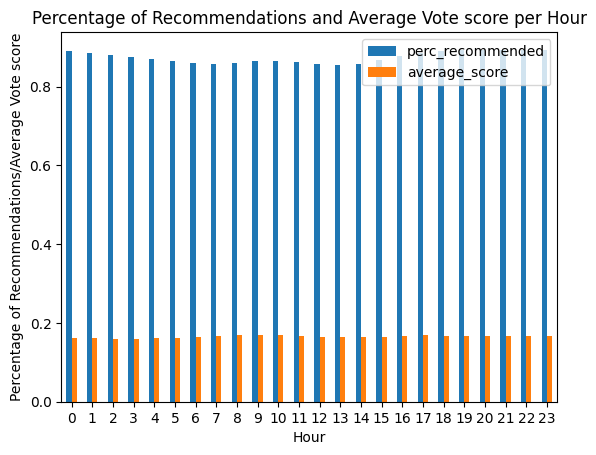

In [86]:
#recommended per hour
df_hour_recommended = df.groupby(['hour','recommended']).size().reset_index(name='count')
df_hour_recommended = df_hour_recommended.pivot(index='hour', columns='recommended', values='count').fillna(0)
df_hour_recommended['perc_recommended'] = df_hour_recommended[True]/(df_hour_recommended[True]+df_hour_recommended[False])
#vote_score per hour
df_hour_score = df.groupby('hour').agg({'weighted_vote_score': 'mean'}).rename(columns={'weighted_vote_score': 'average_score'})
#vote_score and recommended per hour
df_hour_recommended_score=df_hour_recommended.merge(df_hour_score, on='hour').drop(columns=[False,True])

df_hour_recommended_score.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title("Percentage of Recommendations and Average Vote score per Hour")
plt.xlabel("Hour")
plt.ylabel("Percentage of Recommendations/Average Vote score")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

del df_hour_recommended, df_hour_score, df_hour_recommended_score

### Use the function to plot the number of reviews for the following time intervals:
| Initial Time | Final Time |
|--------------|------------|
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |


In [87]:
def plot_reviews_per_time_interval(df, intervals):

    df['time'] = df['date_time_created'].dt.time
    df['time_interval'] = None

    for initial_time, final_time in intervals:
        mask = (df['time'] >= initial_time) & (df['time'] <= final_time)
        df.loc[mask, 'time_interval'] = f"{initial_time} - {final_time}"
        
    df_timed = df['time_interval'].value_counts().fillna(0)
    
    df_timed.plot(kind='bar', color='#000080')
    plt.title("Reviews per Time Interval")
    plt.xlabel("Time Interval")
    plt.ylabel("Review Count")
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()

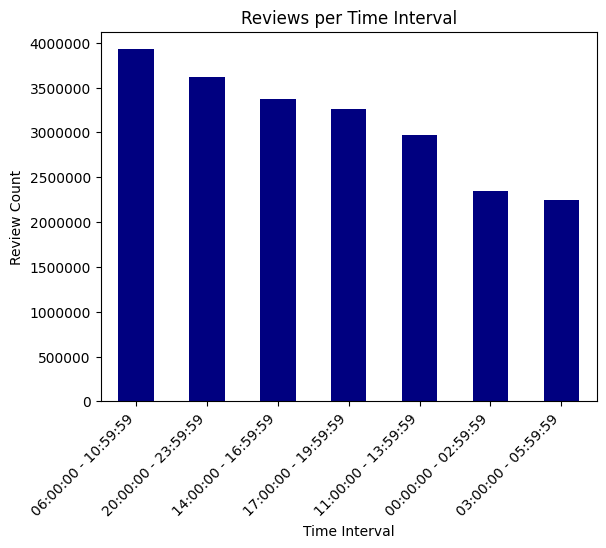

In [88]:
from datetime import time

time_intervals = [
    (time(0, 0, 0), time(2, 59, 59)),
    (time(3, 0, 0), time(5, 59, 59)),
    (time(6, 0, 0), time(10, 59, 59)),
    (time(11, 0, 0), time(13, 59, 59)),
    (time(14, 0, 0), time(16, 59, 59)),
    (time(17, 0, 0), time(19, 59, 59)),
    (time(20, 0, 0), time(23, 59, 59))
]
plot_reviews_per_time_interval(df, time_intervals)

We observe that users post the highest number of reviews between 6 a.m. - 11 a.m. and 8 p.m. - 12 a.m., while the lowest number of reviews is posted between 12 p.m. and 6 a.m.